In [ ]:
library(tidyverse)
library(dplyr)

In [ ]:
df <- read.csv("/content/Layoffs.csv")

In [ ]:
head(df,10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Primer,London,Finance,85,0.33,12/9/2022,Series B,United Kingdom,73
2,Airtable,SF Bay Area,Product,254,0.20,12/8/2022,Series F,United States,1400
3,Swiggy,Bengaluru,Food,250,0.03,12/8/2022,Unknown,India,3600
4,Glints,Singapore,HR,198,0.18,12/8/2022,Series D,Singapore,82
5,CyCognito,SF Bay Area,Security,30,0.15,12/8/2022,Series C,United States,153
6,Loft,Sao Paulo,Real Estate,312,0.12,12/7/2022,Unknown,Brazil,788
7,Plaid,SF Bay Area,Finance,260,0.20,12/7/2022,Series D,United States,734
8,Motive,SF Bay Area,Transportation,237,0.06,12/7/2022,Series F,United States,567
9,Relativity,Chicago,Legal,150,0.10,12/7/2022,Private Equity,United States,125


In [ ]:
summary(df)

   company            location           industry         total_laid_off   
 Length:876         Length:876         Length:876         Min.   :    3.0  
 Class :character   Class :character   Class :character   1st Qu.:   35.0  
 Mode  :character   Mode  :character   Mode  :character   Median :   75.0  
                                                          Mean   :  218.4  
                                                          3rd Qu.:  170.0  
                                                          Max.   :11000.0  
                                                          NA's   :7        
 percentage_laid_off     date              stage             country         
 Min.   :0.0000      Length:876         Length:876         Length:876        
 1st Qu.:0.1000      Class :character   Class :character   Class :character  
 Median :0.1700      Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.2392                                                              
 3

# **DATA CLEANING**

In [ ]:
mean(df$total_laid_off)

[1] NA

In [ ]:
is.null(df)

[1] FALSE

In [ ]:
sum(is.na(df))

[1] 8

In [ ]:
sapply(df, function(x) sum(is.na (x)))

company            location            industry      total_laid_off 
                  0                   0                   0                   7 
percentage_laid_off                date               stage             country 
                  0                   0                   0                   0 
       funds_raised 
                  1

In [ ]:
df  <- replace(df, is.na(df), 0)

In [ ]:
sapply(df, function(x) sum(is.na (x)))

company            location            industry      total_laid_off 
                  0                   0                   0                   0 
percentage_laid_off                date               stage             country 
                  0                   0                   0                   0 
       funds_raised 
                  0

In [ ]:
mean(df$total_laid_off)

[1] 216.6336

In [ ]:
is.numeric(df$total_laid_off)

[1] TRUE

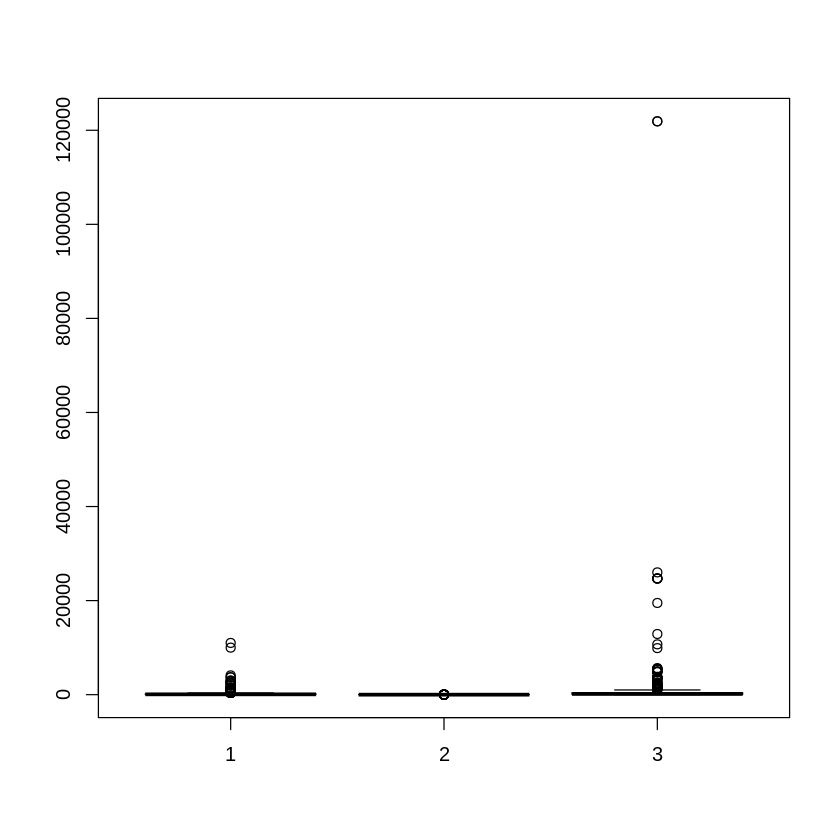

In [ ]:
boxplot(df$total_laid_off,df$percentage_laid_off,df$funds_raised)

In [ ]:
str(df)

'data.frame':	876 obs. of  9 variables:
 $ company            : chr  "Primer" "Airtable" "Swiggy" "Glints" ...
 $ location           : chr  "London" "SF Bay Area" "Bengaluru" "Singapore" ...
 $ industry           : chr  "Finance" "Product" "Food" "HR" ...
 $ total_laid_off     : num  85 254 250 198 30 312 260 237 150 130 ...
 $ percentage_laid_off: num  0.33 0.2 0.03 0.18 0.15 0.12 0.2 0.06 0.1 0.13 ...
 $ date               : chr  "12/9/2022" "12/8/2022" "12/8/2022" "12/8/2022" ...
 $ stage              : chr  "Series B" "Series F" "Unknown" "Series D" ...
 $ country            : chr  "United Kingdom" "United States" "India" "Singapore" ...
 $ funds_raised       : num  73 1400 3600 82 153 788 734 567 125 515 ...


In [ ]:
unique(df$location)

In [ ]:
count(df,industry)

industry,n
<chr>,<int>
Aerospace,3
Construction,10
Consumer,40
Crypto,33
Data,26
Education,34
Energy,3
Finance,127
Fitness,15


In [ ]:
count(df,location)

In [ ]:
df1 <- df[,colSums(is.na(df))<nrow(df)]

In [ ]:
head(df1,5)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Primer,London,Finance,85,0.33,12/9/2022,Series B,United Kingdom,73
2,Airtable,SF Bay Area,Product,254,0.20,12/8/2022,Series F,United States,1400
3,Swiggy,Bengaluru,Food,250,0.03,12/8/2022,Unknown,India,3600
4,Glints,Singapore,HR,198,0.18,12/8/2022,Series D,Singapore,82
5,CyCognito,SF Bay Area,Security,30,0.15,12/8/2022,Series C,United States,153


Checking for duplicate values

In [ ]:
duplicated(df1)

In [ ]:
colnames(df1)[4] = "laid_off"
colnames(df1)[5] = "percentage"

In [ ]:
head(df1)

,company,location,industry,laid_off,percentage,date,stage,country,funds_raised
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Primer,London,Finance,85,0.33,12/9/2022,Series B,United Kingdom,73
2,Airtable,SF Bay Area,Product,254,0.20,12/8/2022,Series F,United States,1400
3,Swiggy,Bengaluru,Food,250,0.03,12/8/2022,Unknown,India,3600
4,Glints,Singapore,HR,198,0.18,12/8/2022,Series D,Singapore,82
5,CyCognito,SF Bay Area,Security,30,0.15,12/8/2022,Series C,United States,153
6,Loft,Sao Paulo,Real Estate,312,0.12,12/7/2022,Unknown,Brazil,788


## EDA

In [ ]:
top = df1[order(df1$laid_off),]
top = tail(top,5)
top

,company,location,industry,laid_off,percentage,date,stage,country,funds_raised
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
98,Twitter,SF Bay Area,Consumer,3700,0.50,11/4/2022,IPO,United States,12900
640,Uber,SF Bay Area,Transportation,3700,0.14,5/6/2020,IPO,United States,24700
59,Cisco,SF Bay Area,Infrastructure,4100,0.05,11/16/2022,IPO,United States,2
58,Amazon,Seattle,Retail,10000,0.03,11/16/2022,IPO,United States,108
85,Meta,SF Bay Area,Consumer,11000,0.13,11/9/2022,IPO,United States,26000


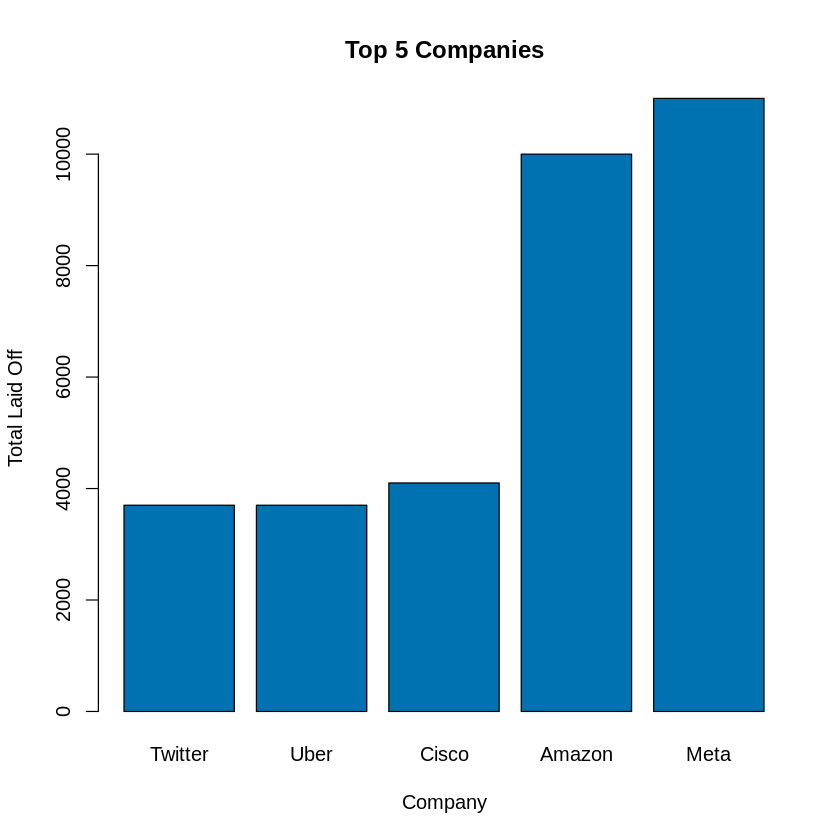

In [ ]:
barplot(top$laid_off, names.arg = top$company, xlab = "Company",
ylab = "Total Laid Off",main = "Top 5 Companies",col = "#0072B2")

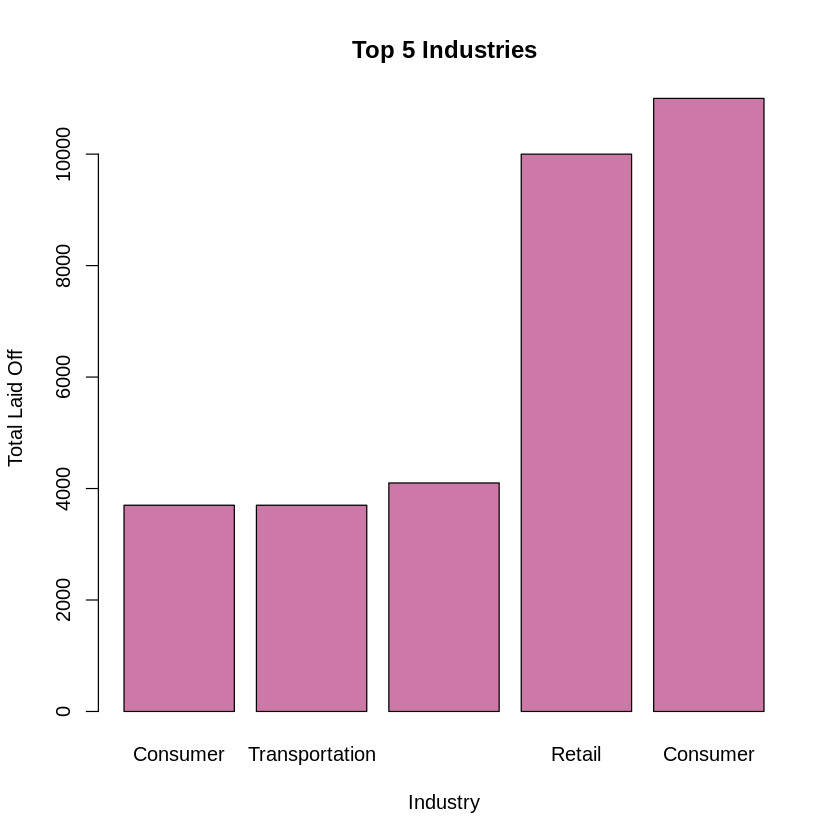

In [ ]:

barplot(top$laid_off, names.arg = top$industry, xlab = "Industry",
ylab = "Total Laid Off",main = "Top 5 Industries",col = "#CC79A7")

In [ ]:
install.packages("wordcloud")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(wordcloud,wordcloud2)


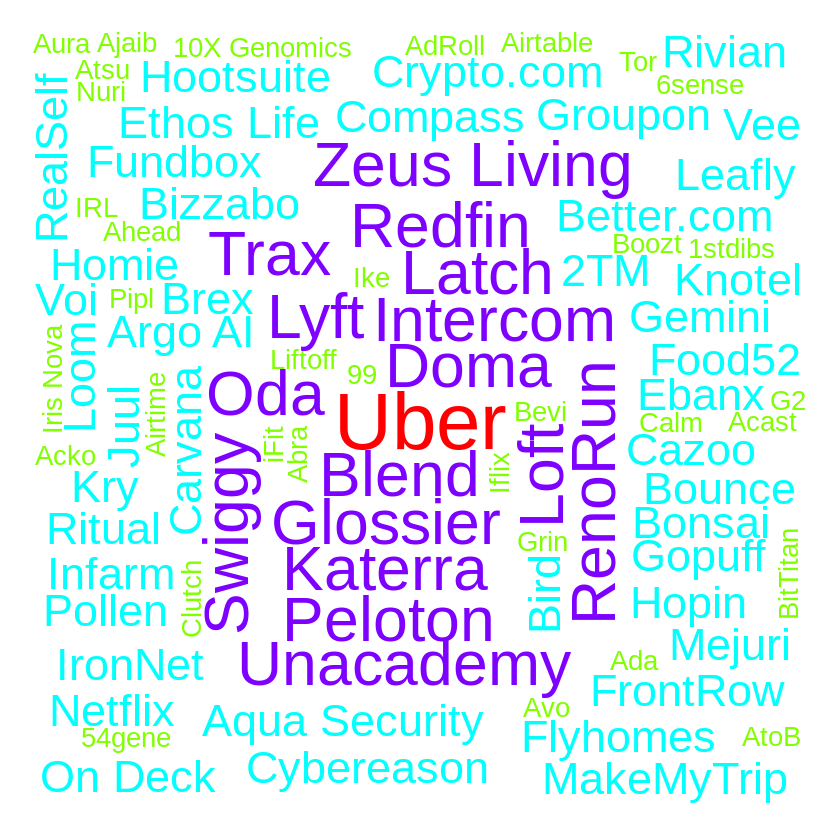

In [ ]:
#suppressWarnings()  
comp = df1$company
word_freq = table(comp)
wordcloud(words = names(word_freq), freq = word_freq, 
min.freq = 15, random.order = FALSE, colors = rainbow(length(word_freq)))
options(warn = -1)


## Correlation Analysis

In [ ]:
cor(df1$laid_off,df1$funds_raised)

[1] 0.1681617

  Calculating Correlation Matrix  as 3x3 matrix(x,y)

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)
library(corrplot)

In [ ]:
cor_matrix <- cor(df1 %>% select_if(is.numeric))
cor_matrix

,laid_off,percentage,funds_raised
laid_off,1.000000000,-0.009534125,0.16816173
percentage,-0.009534125,1.000000000,-0.06882348
funds_raised,0.168161732,-0.068823477,1.00000000


Plotting coorelation Matrix

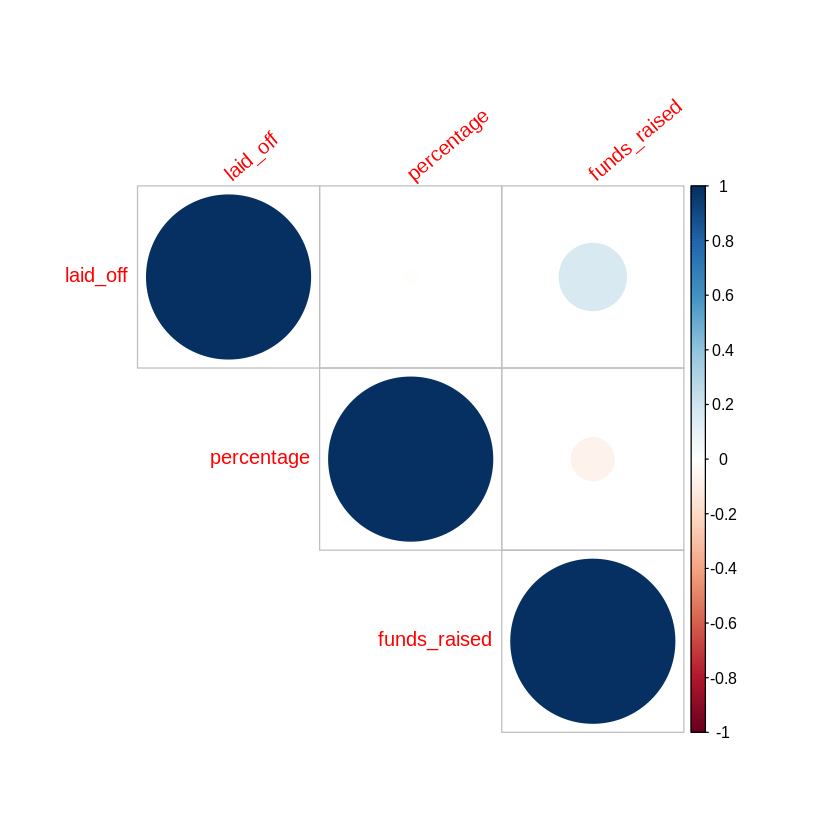

In [ ]:
corrplot(cor_matrix, method = "circle", type = "upper", tl.col = "red", tl.srt = 40,addrect=2)

Converted correlation matrix into dataframe for Manipulation

In [ ]:
cor_df <- as.data.frame(as.table(cor_matrix))
head(cor_df,5)

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,laid_off,laid_off,1.000000000
2,percentage,laid_off,-0.009534125
3,funds_raised,laid_off,0.168161732
4,laid_off,percentage,-0.009534125
5,percentage,percentage,1.000000000


In [ ]:
names(cor_df) <- c("var1", "var2", "correlation")
head(cor_df,5)

,var1,var2,correlation
,<fct>,<fct>,<dbl>
1,laid_off,laid_off,1.000000000
2,percentage,laid_off,-0.009534125
3,funds_raised,laid_off,0.168161732
4,laid_off,percentage,-0.009534125
5,percentage,percentage,1.000000000


Potting Matrix Heatmap

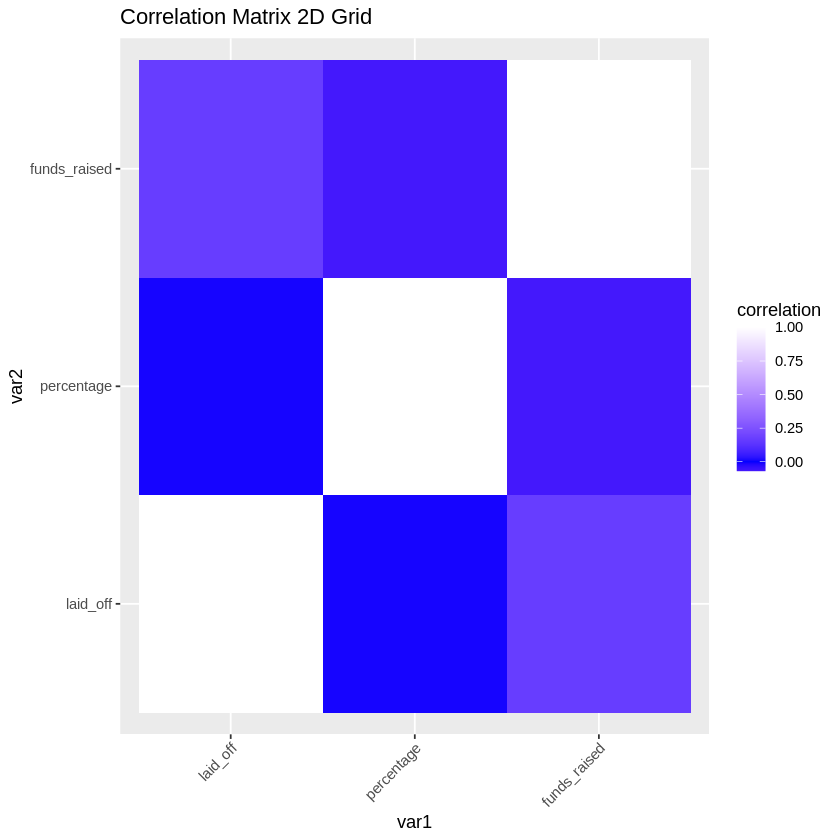

In [ ]:
ggplot(cor_df, aes(x = var1, y = var2, fill = correlation)) +
  geom_tile() +
  scale_fill_gradient2(low = "pink", mid = "blue", high = "white", midpoint = 0) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Correlation Matrix 2D Grid")  

## **FEATURE ENGINEERING**

In [ ]:
sapply(df1, class)    #to check for DataTypes

company     location     industry     laid_off   percentage         date 
 "character"  "character"  "character"    "numeric"    "numeric"  "character" 
       stage      country funds_raised 
 "character"  "character"    "numeric"

Creating new features from existing features


In [ ]:
df2 <- df1 %>%
  mutate(NewFeature= df1$funds_raised + df1$laid_off)
head(df2,5)                 

,company,location,industry,laid_off,percentage,date,stage,country,funds_raised,NewFeature
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Primer,London,Finance,85,0.33,12/9/2022,Series B,United Kingdom,73,158
2,Airtable,SF Bay Area,Product,254,0.20,12/8/2022,Series F,United States,1400,1654
3,Swiggy,Bengaluru,Food,250,0.03,12/8/2022,Unknown,India,3600,3850
4,Glints,Singapore,HR,198,0.18,12/8/2022,Series D,Singapore,82,280
5,CyCognito,SF Bay Area,Security,30,0.15,12/8/2022,Series C,United States,153,183


Applying Logarithmic function

In [ ]:
df1$log_laid_off <- log(df1$laid_off)
head(df1$log_laid_off,1)

[1] 4.442651

Applying Standard scaling

In [ ]:
df1$standardized_laid_off <- scale(df1$laid_off)       #Leave Columns Unchanged


In [ ]:
head(df1$standardized_laid_off,2,1)

-0.20725734
0.05883354


In [ ]:
library(caret)

In [ ]:
head(df2,5)

,company,location,industry,laid_off,percentage,date,stage,country,funds_raised,NewFeature
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Primer,London,Finance,85,0.33,12/9/2022,Series B,United Kingdom,73,158
2,Airtable,SF Bay Area,Product,254,0.20,12/8/2022,Series F,United States,1400,1654
3,Swiggy,Bengaluru,Food,250,0.03,12/8/2022,Unknown,India,3600,3850
4,Glints,Singapore,HR,198,0.18,12/8/2022,Series D,Singapore,82,280
5,CyCognito,SF Bay Area,Security,30,0.15,12/8/2022,Series C,United States,153,183


In [ ]:
#Remove Unnecesary Features

#df2 <- df2 %>% 
#select(-c(df2$laid_off, df2$funds_raised))

Wordcloud for NewFeature

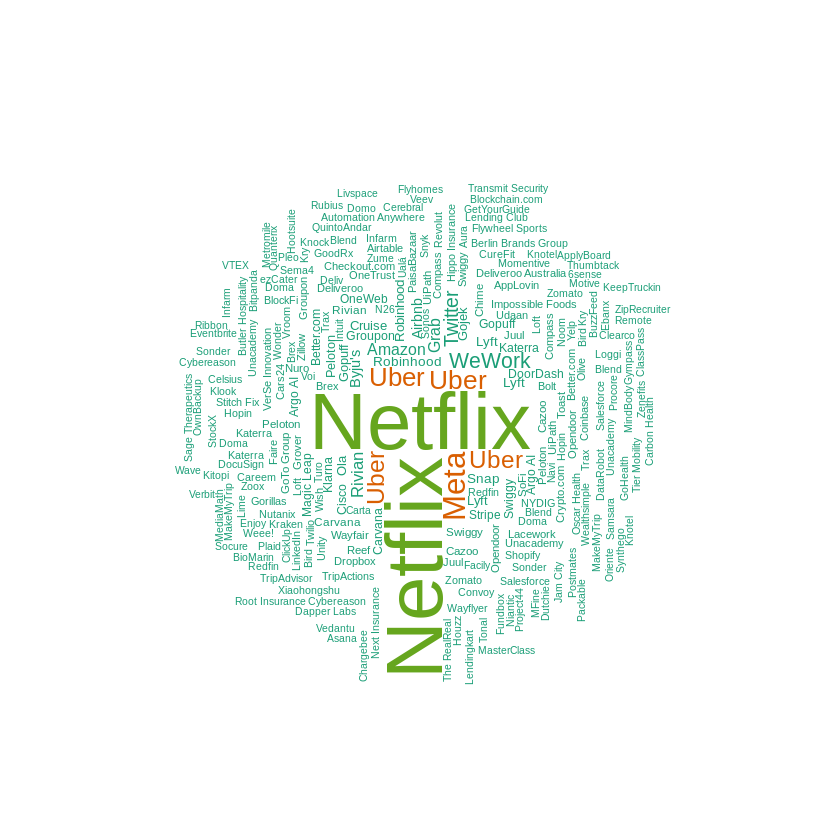

In [ ]:
set.seed(100)
wordcloud(words = df2$company,  freq = df2$NewFeature, min.freq = 3,max.words=250, random.order=FALSE, rot.per=0.50, colors=brewer.pal(5, "Dark2"))

In [ ]:
unique(df$location)

In [ ]:
df1$location = factor(df1$location, levels = c("London", "SF Bay Area", "Bengaluru", "Singapore", "Sao Paulo", "Chicago", "Stockholm", "New York City", "Berlin", "Tel Aviv", "Boston", "Burlington", "Los Angeles", "Jakarta", "Sacramento", "Buenos Aires", "Melbourne", "Waterloo", "Lagos", "Dubai", "Gurugram", "Phoenix", "Gothenburg", "Toronto", "Dublin", "Seattle", "Nairobi", "Dover", "Hamburg", "San Diego", "Logan", "Tallin", "Lehi", "Columbus", "Copenhagen", "Vancouver", "Oslo", "Pittsburgh", "Montreal", "San Luis Obispo", "Jerusalem", "Austin", "New Delhi", "Belo Horizonte", "Salt Lake City", "Bangkok", "Raleigh", "Portland", "Bristol", "Washington D.C.", "Indianapolis", "Stamford", "Curitiba", "Mumbai", "Boulder", "Sydney", "Detroit", "Ottawa", "Ferdericton", "Dakar", "Florianópolis", "Philadelphia", "Hong Kong", "Beijing", "Vienna", "Atlanta", "Dallas", "Spokane", "Chennai", "Reno", "Helsinki", "Malmo", "Kuala Lumpur", "Bend", "Mexico City", "Cincinnati", "Miami", "Moscow", "Shanghai", "Non-U.S.", "Nashville", "Las Vegas", "Edinburgh", "Madison", "Amsterdam", "Santa Fe", "Denver", "Ahmedabad", "Joinville", "Zurich", "Missoula", "Minneapolis", "Guadalajara", "Blumenau", "Milwaukee", "Ann Arbor", "Lisbon", "Munich"),
                         labels = as.integer(0:97))
df1$location

In [ ]:

df1$industry = factor(df1$industry,levels = c('Finance','Product','Food','HR','Security','Real Estate','Transportation','Legal','Marketing','Retail','Media','Crypto','Education','Other','Consumer','Healthcare','Infrastructure','Data','Sales','Fitness','Support','Logistics','Recruiting','Construction','Aerospace','Travel','Energy'),
                       labels = as.integer(0:26))
df1$industry


In [ ]:
unique(df2$stage)

[1] "Series B"       "Series F"       "Unknown"        "Series D"      
 [5] "Series C"       "Private Equity" "Acquired"       "IPO"           
 [9] "Series E"       "Series A"       "Series J"       "Series H"      
[13] "Series G"       "Seed"           "Series I"

In [ ]:
df1$stage = factor(df1$stage, levels = c('Series B','Series F','Unknown','Series D','Series C','Private Equity','Acquired','IPO','Series E','Series A','Series J','Series H','Series G','Seed','Series I'),
                   labels = as.integer(0:14))
df1$stage

In [ ]:
tail(df1)

,company,location,industry,laid_off,percentage,date,stage,country,funds_raised,log_laid_off,standardized_laid_off
,<chr>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
871,Flytedesk,54,8,4,0.20,3/18/2020,13,United States,4,1.386294,-0.3347920
872,Inspirato,86,25,130,0.22,3/16/2020,4,United States,79,4.867534,-0.1364047
873,Help.com,41,20,16,1.00,3/16/2020,13,United States,6,2.772589,-0.3158980
874,HopSkipDrive,12,6,8,0.10,3/13/2020,2,United States,45,2.079442,-0.3284940
875,Panda Squad,1,14,6,0.75,3/13/2020,13,United States,1,1.791759,-0.3316430
876,Tamara Mellon,12,9,20,0.40,3/12/2020,4,United States,90,2.995732,-0.3096000


In [ ]:
head(df1)

,company,location,industry,laid_off,percentage,date,stage,country,funds_raised,log_laid_off,standardized_laid_off
,<chr>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
1,Primer,0,0,85,0.33,12/9/2022,0,United Kingdom,73,4.442651,-0.20725734
2,Airtable,1,1,254,0.20,12/8/2022,1,United States,1400,5.537334,0.05883354
3,Swiggy,2,2,250,0.03,12/8/2022,2,India,3600,5.521461,0.05253553
4,Glints,3,3,198,0.18,12/8/2022,3,Singapore,82,5.288267,-0.02933858
5,CyCognito,1,4,30,0.15,12/8/2022,4,United States,153,3.401197,-0.29385496
6,Loft,4,5,312,0.12,12/7/2022,2,Brazil,788,5.743003,0.15015467


## Spli Dataset Into Train and Test Set.

In [ ]:
n_obs <- nrow(df2)
split <- round(n_obs * 0.7)
train <- df2[1:split,]
test <- df2[(split + 1):nrow(df2),]

In [ ]:
dim(train)
dim(test)

[1] 613  10

[1] 263  10

# K-Means Clustering

In [ ]:
library("NbClust")

In [ ]:
wssplot <- function(df1, nc=15, seed=1234){
               wss <- (nrow(data)-1)*sum(apply(data,2,var))
               for (i in 2:nc){
                    set.seed(seed)
                    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
                plot(1:nc, wss, type="b", xlab="Number of Clusters",
                     ylab="Within groups sum of squares")}

In [ ]:
df_scaled <- scale(df2$laid_off[])
head(df_scaled)

-0.20725734
0.05883354
0.05253553
-0.02933858
-0.29385496
0.15015467


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


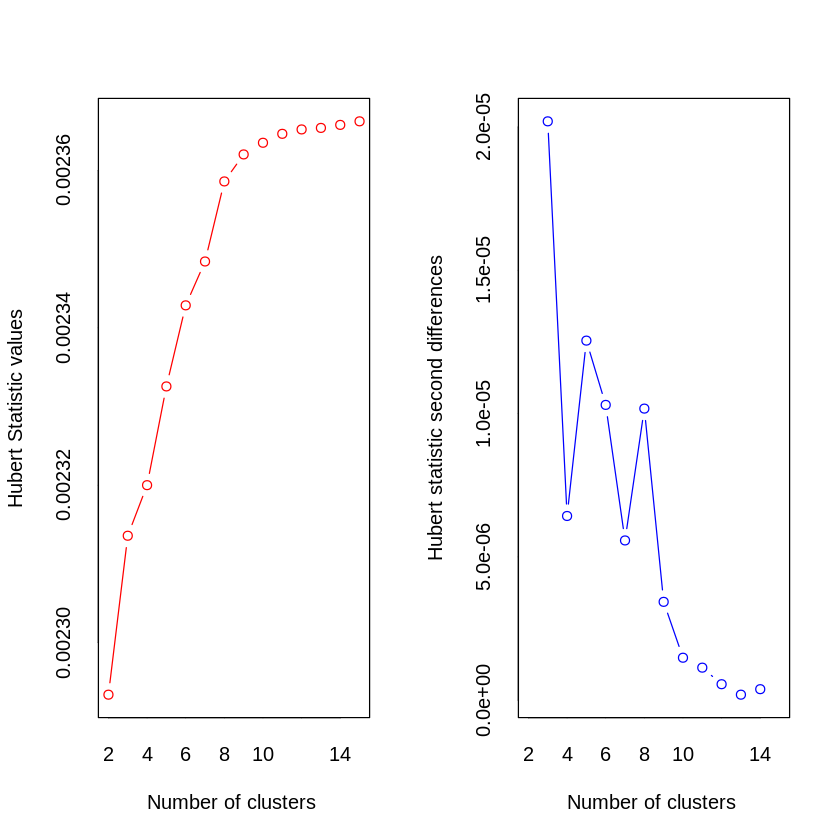

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 3 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


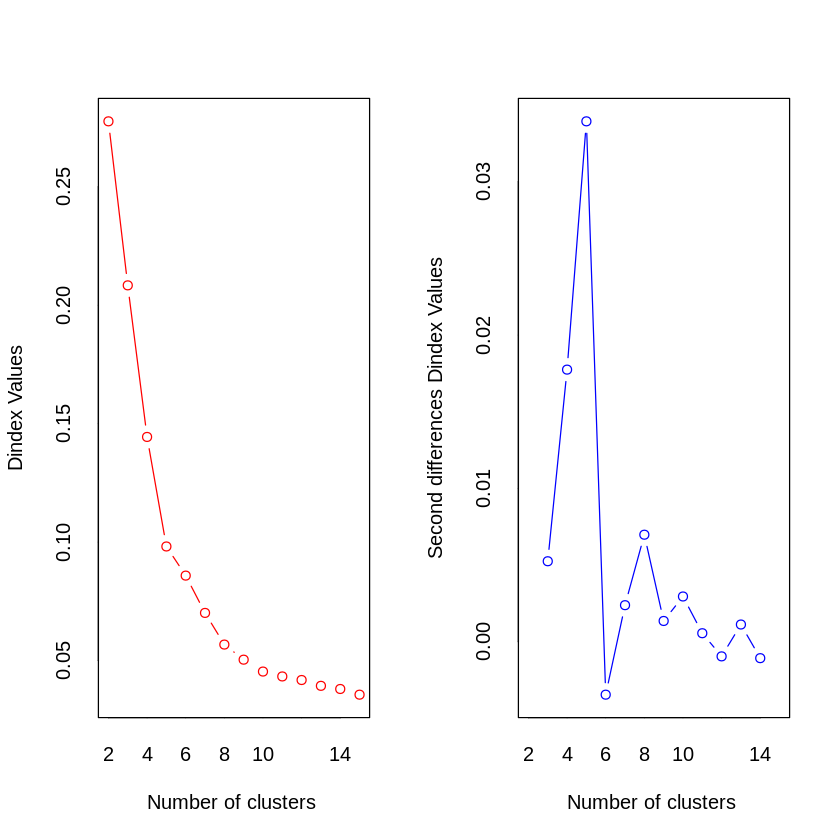

In [ ]:
nc <- NbClust(df_scaled, min.nc=2, max.nc=15, method="kmeans")

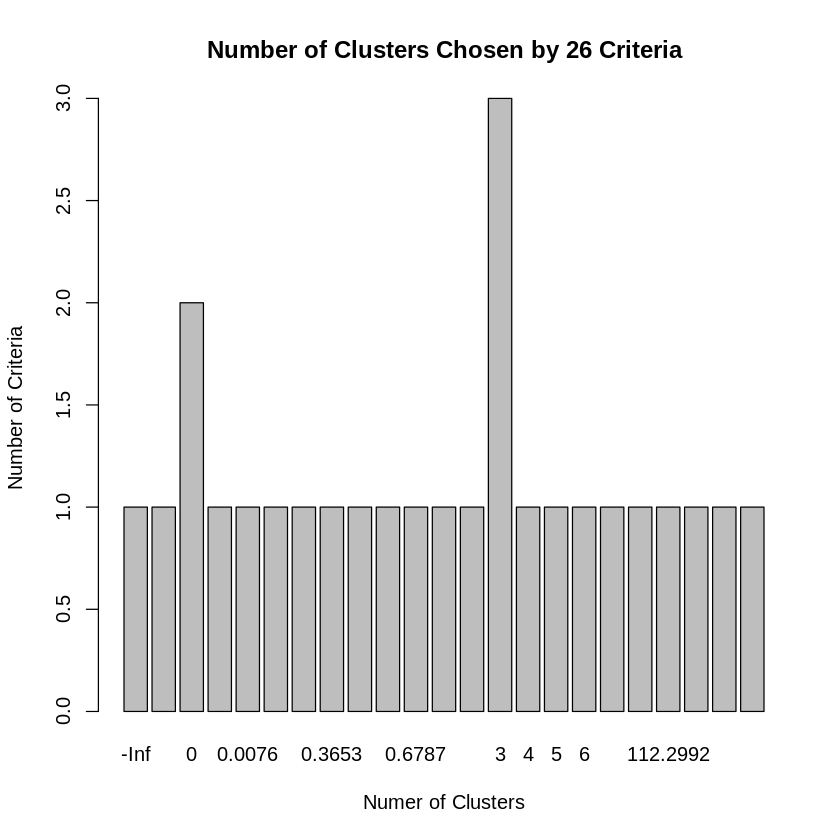

In [ ]:
barplot(table(nc$Best.n[1,]),
          xlab="Numer of Clusters", ylab="Number of Criteria",
          main="Number of Clusters Chosen by 26 Criteria")


In [ ]:
fit.km <- kmeans(df2$laid_off, 3, nstart=25)

In [ ]:
fit.km$size

[1]   2  36 838

In [ ]:
fit.km$centers

1,10500.0000
2,1751.5556
3,126.1516


In [ ]:

aggregate(df[-1], by=list(cluster=fit.km$cluster),mean)

cluster,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,10500.0000,0.0800000,NA,NA,NA,13054.0000
2,NA,NA,1751.5556,0.2516250,NA,NA,NA,3172.1222
3,NA,NA,126.1516,0.2390263,NA,NA,NA,750.0017


# Random Forest

In [ ]:
library(randomForest)

In [ ]:
model_eval<-randomForest(formula= laid_off~.,data = train)
model_eval


Call:
 randomForest(formula = laid_off ~ ., data = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 341098.5
                    % Var explained: 32.64

In [ ]:
pred.rf <- predict(model_eval,test)
rmse.rf <- sqrt(sum(((pred.rf) - test$laid_off)^2)/
                  length(test$laid_off))
c(RMSE = rmse.rf, pseudoR2 = mean(model_eval$rsq))

RMSE    pseudoR2 
221.1303407   0.3297129

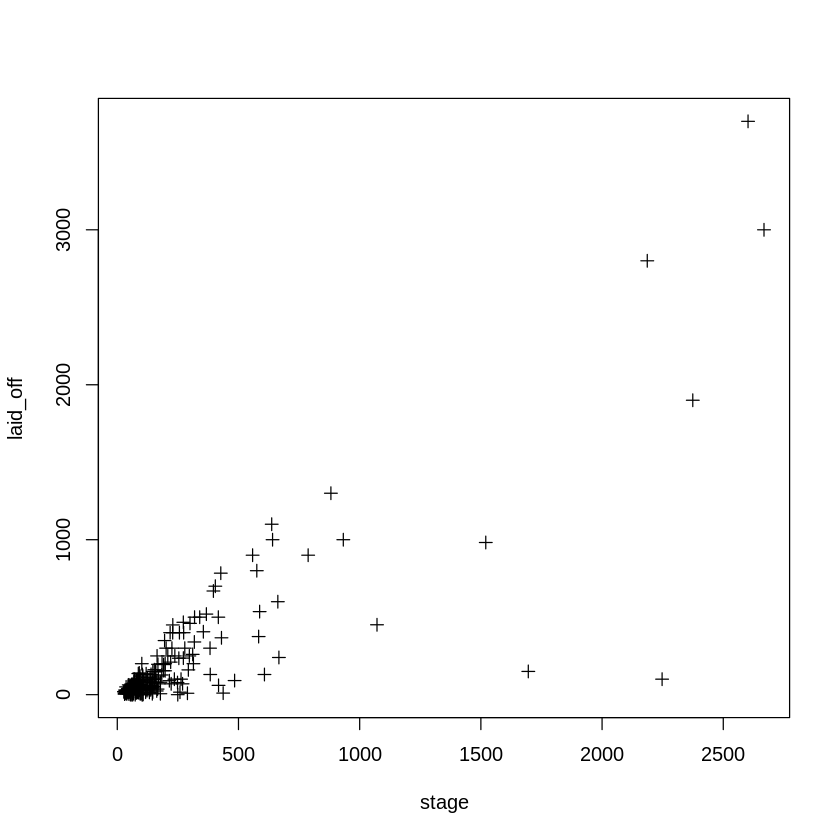

In [ ]:
plot(pred.rf,test$laid_off, xlab = "stage", ylab = "laid_off", pch = 3)

In [ ]:
predicted_model_eval<-predict(model_eval,test)

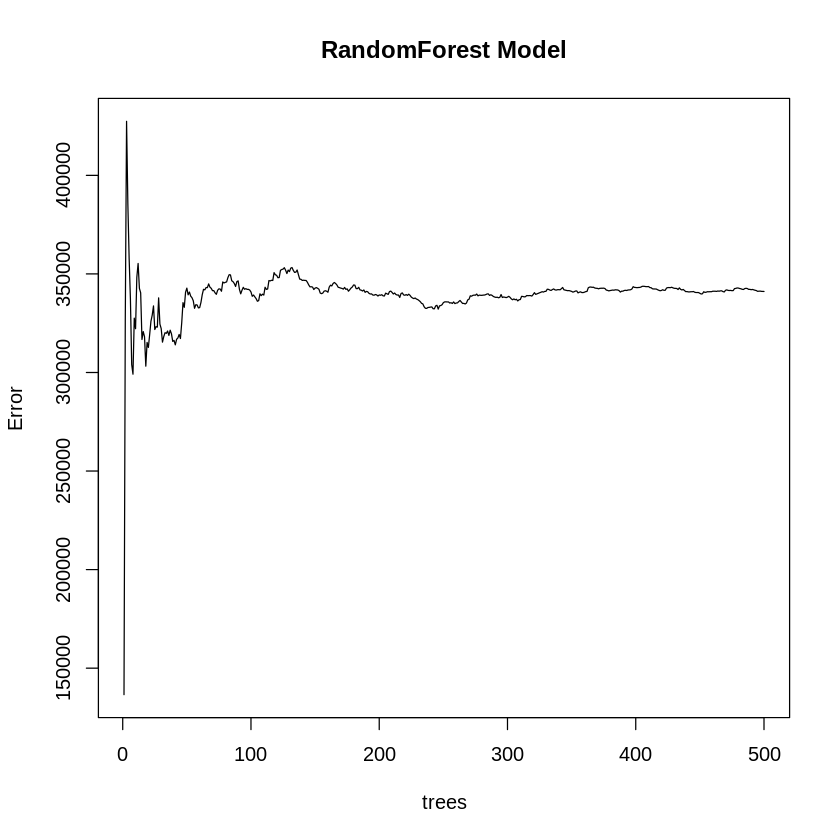

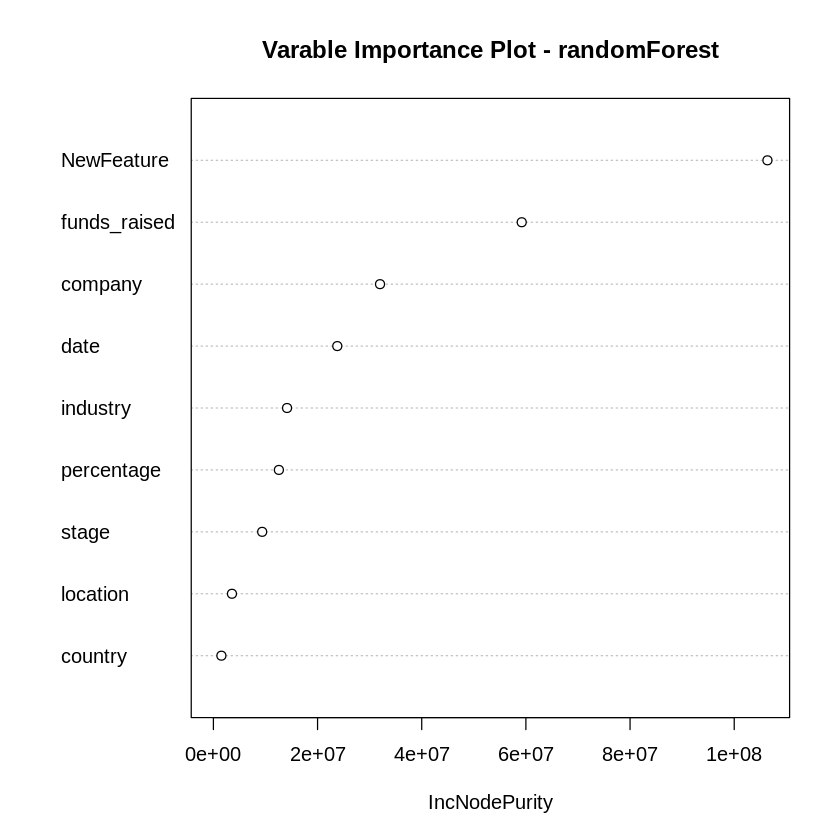

In [ ]:
plot(model_eval, main="RandomForest Model")
varImpPlot(model_eval,sort=TRUE,main = "Varable Importance Plot - randomForest")

In [ ]:
glimpse(df2)

Rows: 876
Columns: 10
$ company      <chr> "Primer", "Airtable", "Swiggy", "Glints", "CyCognito", "L…
$ location     <chr> "London", "SF Bay Area", "Bengaluru", "Singapore", "SF Ba…
$ industry     <chr> "Finance", "Product", "Food", "HR", "Security", "Real Est…
$ laid_off     <dbl> 85, 254, 250, 198, 30, 312, 260, 237, 150, 130, 120, 40, …
$ percentage   <dbl> 0.330, 0.200, 0.030, 0.180, 0.150, 0.120, 0.200, 0.060, 0…
$ date         <chr> "12/9/2022", "12/8/2022", "12/8/2022", "12/8/2022", "12/8…
$ stage        <chr> "Series B", "Series F", "Unknown", "Series D", "Series C"…
$ country      <chr> "United Kingdom", "United States", "India", "Singapore", …
$ funds_raised <dbl> 73, 1400, 3600, 82, 153, 788, 734, 567, 125, 515, 116, 23…
$ NewFeature   <dbl> 158, 1654, 3850, 280, 183, 1100, 994, 804, 275, 645, 236,…


#Linear Regression

Building the Model

In [ ]:
model_eval<-lm(laid_off~stage,data = train)
summary(model_eval)


Call:
lm(formula = laid_off ~ stage, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
 -637.6  -138.6   -49.2    14.2 10346.4 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)           165.77     134.76   1.230  0.21915   
stageIPO              487.87     149.72   3.259  0.00118 **
stagePrivate Equity   181.05     247.16   0.733  0.46414   
stageSeed             -97.50     222.80  -0.438  0.66182   
stageSeries A        -111.88     169.28  -0.661  0.50891   
stageSeries B         -82.30     154.22  -0.534  0.59375   
stageSeries C         -66.60     154.00  -0.432  0.66554   
stageSeries D         -59.07     157.82  -0.374  0.70832   
stageSeries E         -37.69     173.11  -0.218  0.82770   
stageSeries F          27.17     214.33   0.127  0.89916   
stageSeries G         245.90     311.22   0.790  0.42978   
stageSeries H         346.13     255.70   1.354  0.17635   
stageSeries I         189.23     504.24   0.375  0.70758   

Prediction on test set

In [ ]:
pred.lm <- predict(model_eval,test)

In [ ]:
results <- cbind(pred.lm,test$laid_off)

In [ ]:
rmse.lm <- sqrt(sum((pred.lm - test$laid_off)^2)/length(test$stage))

In [ ]:
c(RMSE = rmse.lm, R2 = summary(model_eval)$r.squared)

RMSE           R2 
354.75351284   0.09039483

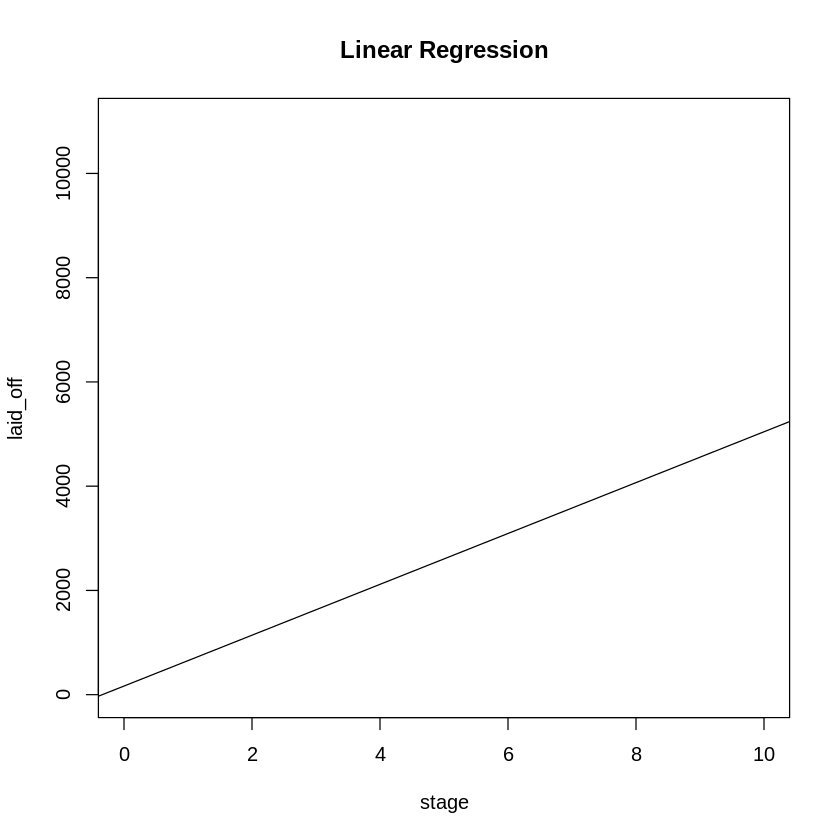

In [ ]:
plot(df2$stage, df2$laid_off, main = "Linear Regression", 
     xlab = "stage",ylab = "laid_off",xlim = c(0,10))
abline(model_eval)

## Naive Bayes 

In [ ]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
nb<-naiveBayes(formula= laid_off~stage, data = train)
predicted_nb= predict(nb,test)

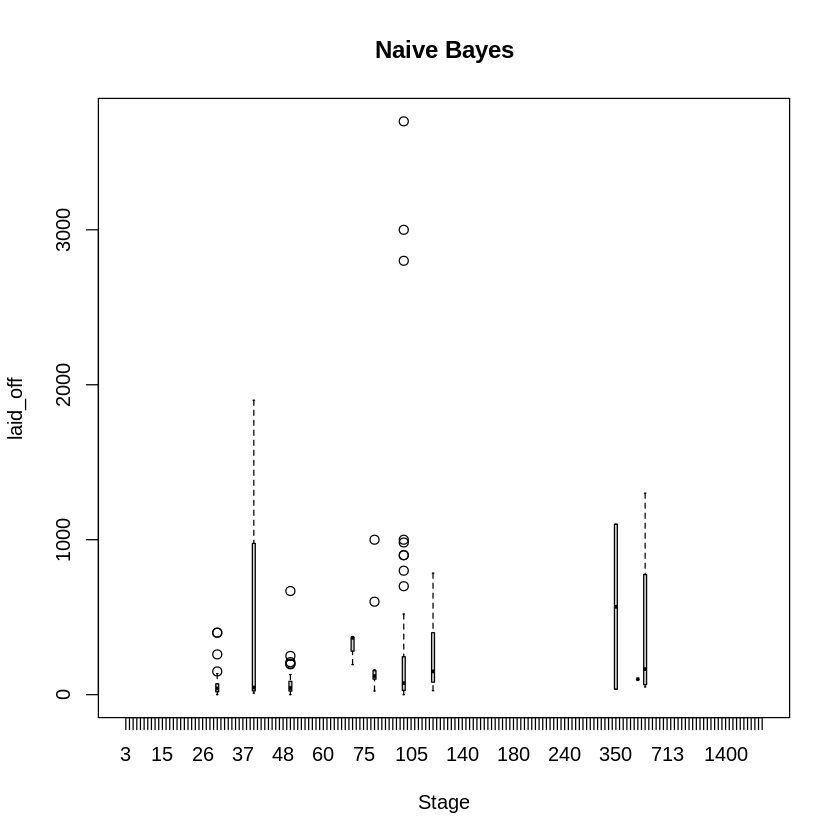

In [ ]:
plot(predicted_nb, test$laid_off , main="Naive Bayes", xlab="Stage",ylab="laid_off")